# Supervised learning using scikit-learn

The goal of this tutorial is to introduce you to the scikit libraries for classification. We will also cover feature selection, and evaluation.

In [1]:
import numpy as np
import scipy.sparse as sp_sparse

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics

import seaborn as sns

%matplotlib inline

## Feature Selection

Feature selection is about finding the best features for your classifier. This may be important if you do not have enough training data. The idea is to find metrics that either characterize the features by themselves, or with respect to the class we want to predict, or with respect to other features.

http://scikit-learn.org/stable/modules/feature_selection.html

#### Variance Threshold

The **VarianceThreshold** selection drops features whose variance is below some threshold. If we have binary features we can estimate the treshold exactly so as to guarantee a specific ratio of 0's and 1's

In [2]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
print(np.array(X))
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [3]:
import sklearn.datasets as sk_data
iris = sk_data.load_iris()
X = iris.data
print(X[1:10,:])
print(X.var(axis = 0))
sel = VarianceThreshold(threshold=0.2)
sel.fit_transform(X)[1:10]

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0.68112222 0.18871289 3.09550267 0.57713289]


array([[4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1]])

#### Univariate Feature Selection ####

A more sophisticated feature selection technique uses test to determine if a feature and the class label are independent. An example of such a test is the [chi-square test](https://en.wikipedia.org/wiki/Chi-squared_test) (there are more)

In this case we keep the features with high chi-square score and low p-value. 

The features with the lowest scores and highest p-values are rejected.

The chi-square test is usually applied on categorical data.

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = sk_data.load_iris()
X, y = iris.data, iris.target
print(X.shape)
print('Features:')
print(X[1:10,:])
print('Labels:')
print(y[1:10])
sel = SelectKBest(chi2, k=2)
X_new = sel.fit_transform(X, y)
print('Selected Features:')
print(X_new[1:10])

(150, 4)
Features:
[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Labels:
[0 0 0 0 0 0 0 0 0]
Selected Features:
[[1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]


The chi-square values and the p-values between features and target variable (X columns and y)

In [5]:
print('Chi2 values')
print(sel.scores_)
c,p = sk.feature_selection.chi2(X, y)
print('Chi2 values')
print(c) #The chi-square value between X columns and y
print('p-values')
print(p) #The p-value for the test

Chi2 values
[ 10.81782088   3.7107283  116.31261309  67.0483602 ]
Chi2 values
[ 10.81782088   3.7107283  116.31261309  67.0483602 ]
p-values
[4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


## Supervised Learning

Python has several classes and objects for implementing different supervised learning techniques such as Regression and Classification. 

Regardless of the model being implemented, the following methods are implemented:

The method **fit()** takes the training data and labels/values, and trains the model

The method **predict()** takes as input the test data and applies the model. 

## Preparing the data

To perform classification we first need to prepare the data into train and test datasets.

In [6]:
from sklearn.datasets import load_iris
import sklearn.utils as utils

iris = load_iris()
print("sample of data")
print(iris.data[:5,:])
print("the class labels vector")
print(iris.target)
print("the names of the classes:",iris.target_names)
print(iris.feature_names)

sample of data
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
the class labels vector
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
the names of the classes: ['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Randomly shuffle the data. This is useful to know that the data is in random order

In [7]:
X, y = utils.shuffle(iris.data, iris.target, random_state=1) #shuffle the data
print(X.shape)
print(y.shape)
print(y)

(150, 4)
(150,)
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0 2 2 1 1 2 2 0
 1 1 2 1 2 1 0 0 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1 1 0 1 0 0 2 2
 2 0 0 1 0 2 0 2 2 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0 2 1 2 1 2 2 1
 2 0]


Select a subset for training and a subset for testing

In [8]:
train_set_size = 100
X_train = X[:train_set_size]  # selects first 100 rows (examples) for train set
y_train = y[:train_set_size]
X_test = X[train_set_size:]   # selects from row 100 until the last one for test set
y_test = y[train_set_size:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


We can also use the <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split">train_test_split function</a> of python for splitting the data into train and test sets. In this case you do not need the random shuffling (but it does not hurt).

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Classification models

http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

Python has classes and objects that implement the different classification techniques that we described in class. 

### Decision Trees
http://scikit-learn.org/stable/modules/tree.html

Train and apply a decision tree classifier. The default score computed in the classifier object is the accuracy. Decision trees can also give us probabilities

In [10]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

print("classifier accuracy:",dtree.score(X_test,y_test))

y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)
print("classifier predictions:",y_pred[:10])
print("ground truth labels   :",y_test[:10])
print(y_prob[:10])

classifier accuracy: 0.9333333333333333
classifier predictions: [2 2 2 0 0 0 2 2 2 2]
ground truth labels   : [1 2 2 0 0 0 2 2 2 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


Compute some more metrics

In [11]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

accuracy: 0.9333333333333333

Confusion matrix
[[20  0  0]
 [ 0 17  2]
 [ 0  2 19]]

Precision Score per class
[1.         0.89473684 0.9047619 ]

Average Precision Score
0.9333333333333333

Recall Score per class
[1.         0.89473684 0.9047619 ]

Average Recall Score
0.9333333333333333

F1-score Score per class
[1.         0.89473684 0.9047619 ]

Average F1 Score
0.9333333333333333


Visualize the decision tree.

For this you will need to install the package python-graphviz

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


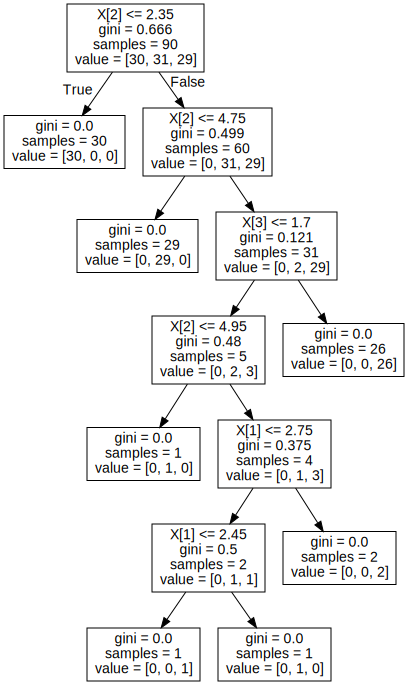

In [12]:
#conda install python-graphviz
import graphviz 
print(iris.feature_names)
dot_data = tree.export_graphviz(dtree,out_file=None)
graph = graphviz.Source(dot_data)
graph

0.9166666666666666


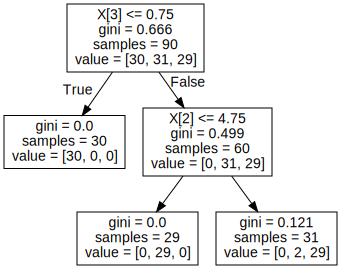

In [13]:
dtree2 = tree.DecisionTreeClassifier(max_depth=2)
dtree2 = dtree2.fit(X_train, y_train)
print(dtree2.score(X_test,y_test))
dot_data2 = tree.export_graphviz(dtree2,out_file=None)
graph2 = graphviz.Source(dot_data2)
graph2


### k-NN Classification ###

https://scikit-learn.org/stable/modules/neighbors.html#classification

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("classifier score:", knn.score(X_test,y_test))

y_pred = knn.predict(X_test)

print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

classifier score: 0.9333333333333333

accuracy: 0.9333333333333333

Confusion matrix
[[20  0  0]
 [ 0 16  3]
 [ 0  1 20]]

Precision Score per class
[1.         0.94117647 0.86956522]

Average Precision Score
0.9357203751065644

Recall Score per class
[1.         0.84210526 0.95238095]

Average Recall Score
0.9333333333333333

F1-score Score per class
[1.         0.88888889 0.90909091]

Average F1 Score
0.9329966329966328


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

### SVM Classification

http://scikit-learn.org/stable/modules/svm.html

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [15]:
from sklearn import svm

#svm_clf = svm.LinearSVC()
#svm_clf = svm.SVC(kernel = 'poly')
svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)
print("classifier score:",svm_clf.score(X_test,y_test))
y_pred = svm_clf.predict(X_test)
print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

classifier score: 0.95

accuracy: 0.95

Confusion matrix
[[20  0  0]
 [ 0 18  1]
 [ 0  2 19]]

Precision Score per class
[1.   0.9  0.95]

Average Precision Score
0.9508333333333333

Recall Score per class
[1.         0.94736842 0.9047619 ]

Average Recall Score
0.95

F1-score Score per class
[1.         0.92307692 0.92682927]

Average F1 Score
0.9500312695434646


### Logistic Regression ###

http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [16]:
import sklearn.linear_model as linear_model

lr_clf = linear_model.LogisticRegression(solver='lbfgs')
lr_clf.fit(X_train, y_train)
print("classifier score:",lr_clf.score(X_test,y_test))
y_pred = lr_clf.predict(X_test)
print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))


classifier score: 0.95

accuracy: 0.95

Confusion matrix
[[20  0  0]
 [ 0 17  2]
 [ 0  1 20]]

Precision Score per class
[1.         0.94444444 0.90909091]

Average Precision Score
0.9505892255892257

Recall Score per class
[1.         0.89473684 0.95238095]

Average Recall Score
0.95

F1-score Score per class
[1.         0.91891892 0.93023256]

Average F1 Score
0.9499057196731615


For Logistic Regression we can also obtain the probabilities for the different classes

In [17]:
probs = lr_clf.predict_proba(X_test)
print("Class Probabilities (first 10):")
print (probs[:10])
print(y_test[:10])
print(probs.argmax(axis = 1)[:10])
print(probs.max(axis = 1)[:10])

Class Probabilities (first 10):
[[3.57734848e-03 4.78993829e-01 5.17428823e-01]
 [1.14793557e-03 4.05790308e-01 5.93061756e-01]
 [3.93057726e-05 6.43403533e-02 9.35620341e-01]
 [9.57992494e-01 4.20057847e-02 1.72111135e-06]
 [9.43314566e-01 5.66824755e-02 2.95895565e-06]
 [9.82884159e-01 1.71154037e-02 4.37041484e-07]
 [5.56184067e-05 7.14905187e-02 9.28453863e-01]
 [1.95627597e-04 1.77447474e-01 8.22356898e-01]
 [1.39827861e-04 1.43545432e-01 8.56314741e-01]
 [1.27971563e-05 1.91614584e-02 9.80825744e-01]]
[1 2 2 0 0 0 2 2 2 2]
[2 2 2 0 0 0 2 2 2 2]
[0.51742882 0.59306176 0.93562034 0.95799249 0.94331457 0.98288416
 0.92845386 0.8223569  0.85631474 0.98082574]


And the coeffients of the logistic regression model

In [18]:
print(lr_clf.coef_)

[[-0.41392169  0.72653317 -2.19127669 -0.95006913]
 [ 0.08012925 -0.38613281 -0.02275503 -0.69474957]
 [ 0.33379244 -0.34040036  2.21403172  1.6448187 ]]


## Linear Regression

Linear Regression is implemented in the library sklearn.linear_model.LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [20]:
from sklearn.linear_model import LinearRegression
X_reg = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

# y = 1 * x_0 + 2 * x_1 + 3
y_reg = np.dot(X_reg, np.array([1, 2])) + 3

reg = LinearRegression().fit(X_reg, y_reg)



In [21]:
#Obtain the function coefficients
print(reg.coef_)
#and the intercept
print(reg.intercept_)

[1. 2.]
3.000000000000001


The [$R^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination) computes the "explained variance"

$R^2 = 1-\frac{\sum_i (y_i -\hat y_i)^2}{\sum_i (y_i -\bar y)^2}$

where $\hat y_i$ is the prediction for point $x_i$ and $\bar y$ is the mean value of the target variable

In [22]:
print(reg.score(X_reg, y_reg))

1.0


In [23]:
#Predict for a new point
reg.predict(np.array([[3, 5]]))

array([16.])

A more complex example with the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

In [24]:
diabetes_X, diabetes_y = sk_data.load_diabetes(return_X_y=True)

# Shuffle the data
diabetes_X, diabetes_y = utils.shuffle(diabetes_X, diabetes_y, random_state=1)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
# Computed over the *test* data
print('Coefficient of determination: %.2f'
      % metrics.r2_score(diabetes_y_test, diabetes_y_pred))
print('Predictions:')
print(diabetes_y_pred)
print('True values:')
print(diabetes_y_test)

Coefficients: 
 [  -8.80343059 -238.68845774  515.45209151  329.26528155 -878.18276219
  530.03363161  126.03912568  213.28475276  734.46021416   67.32526032]
Mean squared error: 2304.97
Coefficient of determination: 0.68
Predictions:
[149.75303117 199.7656287  248.11294766 182.95040528  98.34540804
  96.66271486 248.59757565  64.84343648 234.52373522 209.30957394
 179.26665684  85.95716856  70.54292903 197.93453267 100.34630781
 116.81521079 134.97372936  64.08572743 178.32873088 155.32247369]
True values:
[168. 221. 310. 283.  81.  94. 277.  72. 270. 268. 174.  96.  83. 222.
  69. 153. 202.  43. 124. 276.]


## More Evaluation

http://scikit-learn.org/stable/model_selection.html#model-selection

### Computing Scores

In [25]:
p,r,f,s = metrics.precision_recall_fscore_support(y_test,y_pred)
print(p)
print(r)
print(f)
print(s)

[1.         0.94444444 0.90909091]
[1.         0.89473684 0.95238095]
[1.         0.91891892 0.93023256]
[20 19 21]


In [26]:
report = metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.94      0.89      0.92        19
           2       0.91      0.95      0.93        21

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



The [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

In [27]:
cancer_data = sk_data.load_breast_cancer()
X_cancer,y_cancer  = utils.shuffle(cancer_data.data, cancer_data.target, random_state=1)
X_cancer_train = X_cancer[:500]
y_cancer_train = y_cancer[:500]
X_cancer_test = X_cancer[500:]
y_cancer_test = y_cancer[500:]
lr_clf.fit(X_cancer_train, y_cancer_train)
print("classifier score:",lr_clf.score(X_cancer_test,y_cancer_test))

classifier score: 0.9565217391304348


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Class Probabilities (first 10):
[[5.60422369e-01 4.39577631e-01]
 [7.03281401e-03 9.92967186e-01]
 [9.99988304e-01 1.16956041e-05]
 [9.99894278e-01 1.05722247e-04]
 [2.39455667e-02 9.76054433e-01]
 [9.99983718e-01 1.62819123e-05]
 [4.47497687e-03 9.95525023e-01]
 [1.62579095e-03 9.98374209e-01]
 [1.78903213e-03 9.98210968e-01]
 [6.40995488e-02 9.35900451e-01]]
[1.         0.97619048 0.97619048 0.97619048 0.95238095 0.92857143
 0.9047619  0.88095238 0.85714286 0.83333333 0.80952381 0.78571429
 0.76190476 0.76190476 0.73809524 0.71428571 0.69047619 0.66666667
 0.64285714 0.61904762 0.5952381  0.57142857 0.54761905 0.52380952
 0.5        0.47619048 0.45238095 0.42857143 0.4047619  0.38095238
 0.35714286 0.33333333 0.30952381 0.28571429 0.26190476 0.23809524
 0.21428571 0.19047619 0.16666667 0.14285714 0.11904762 0.0952381
 0.07142857 0.04761905 0.02380952 0.        ]
[0.93333333 0.93181818 0.95348837 0.97619048 0.97560976 0.975
 0.97435897 0.97368421 0.97297297 0.97222222 0.97142857 0.970

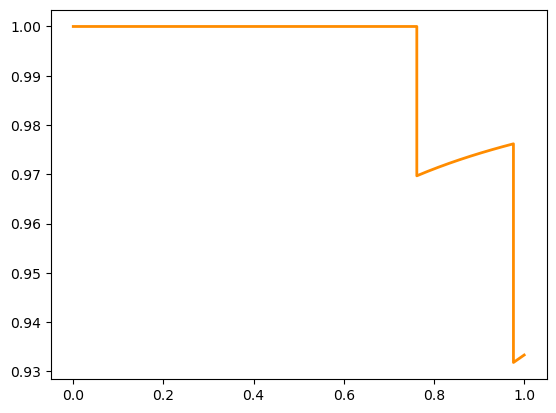

In [28]:
y_cancer_pred = lr_clf.predict(X_cancer_test)
cancer_probs = lr_clf.predict_proba(X_cancer_test)
print("Class Probabilities (first 10):")
print (cancer_probs[:10])
y_cancer_scores = cancer_probs[:,1]
precision, recall, thresholds = metrics.precision_recall_curve(y_cancer_test,y_cancer_scores)
#plt.scatter(recall,precision)
plt.plot(recall,precision, color='darkorange',lw=2)
print(recall)
print(precision)
print(thresholds)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.9894179894179893


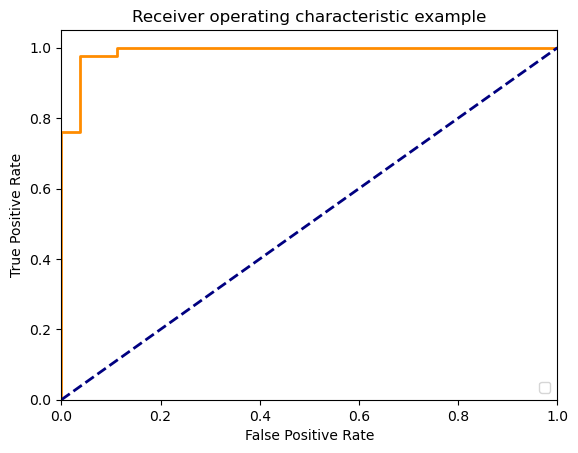

In [29]:
fpr, tpr, ths = metrics.roc_curve(y_cancer_test,y_cancer_scores)
plt.plot(fpr,tpr,color='darkorange',lw=2)
print(metrics.roc_auc_score(y_cancer_test,y_cancer_scores))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

[[9.10645113e-05 9.99908935e-01]
 [9.96438418e-01 3.56158190e-03]
 [7.42143596e-01 2.57856404e-01]
 [9.38999217e-01 6.10007831e-02]
 [9.91309931e-01 8.69006872e-03]
 [9.47449619e-01 5.25503809e-02]
 [5.92826223e-02 9.40717378e-01]
 [9.64911741e-01 3.50882594e-02]
 [9.75574764e-01 2.44252358e-02]
 [9.97723716e-01 2.27628412e-03]]


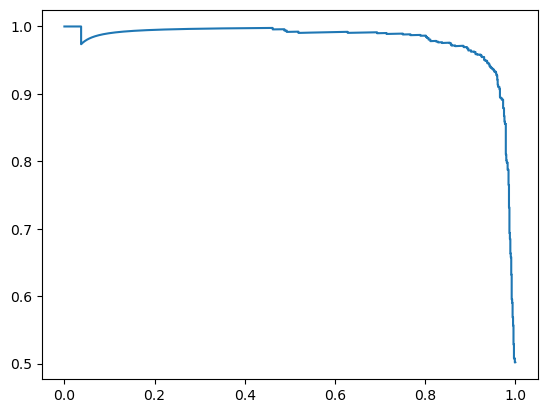

In [32]:
(Xtoy,y_toy)=sk_data.make_classification(n_samples=10000)
Xttrain = Xtoy[:8000,:]
Xttest = Xtoy[8000:,:]
yttrain = y_toy[:8000]
yttest = y_toy[8000:]

lr_clf.fit(Xttrain, yttrain)
#print(lr_clf.score(Xttest,yttest))
#y_tpred = lr_clf.predict(X_test)
tprobs = lr_clf.predict_proba(Xttest)
print (tprobs[:10])

y_tscores = tprobs[:,1]
precision, recall, thresholds = metrics.precision_recall_curve(yttest,y_tscores)
plt.plot(recall,precision)

### k-fold cross validation ###

In k-fold cross validation the data is split into k equal parts, the k-1 are used for training and the last one for testing. k models are trained, each time leaving a different part for testing

https://scikit-learn.org/stable/modules/cross_validation.html

There are two methods for implementing k-fold cross-validation, under the library model selection: <a href = https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html>cross_val_score</a>, and <a href = https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html>cross validate</a>. The latter allows multiple metrics to be considered together.

In [33]:
import sklearn.model_selection as model_selection

scores = model_selection.cross_val_score(#lr_clf,
                                          #svm_clf,
                                          #knn,
                                          dtree,
                                          X,
                                          y,
                                          scoring='f1_weighted',
                                          cv=5)
print (scores)
print (scores.mean())

[1.         0.93333333 0.96658312 0.96658312 0.86111111]
0.9455221386800334


In [34]:
scores = model_selection.cross_validate(#lr_clf,
                                          #svm_clf,
                                          #knn,
                                          dtree,
                                          X,
                                          y,
                                          scoring=['precision_weighted','recall_weighted'],
                                          cv=3)
print (scores)
print (scores['test_precision_weighted'].mean(),scores['test_recall_weighted'].mean())

{'fit_time': array([0.00299859, 0.00099945, 0.00099969]), 'score_time': array([0.00499654, 0.0039978 , 0.00300026]), 'test_precision_weighted': array([0.96      , 0.90834586, 0.90771429]), 'test_recall_weighted': array([0.96, 0.9 , 0.9 ])}
0.9253533834586466 0.9199999999999999


### Creating a pipeline

If the same steps are often repeated, you can create a pipeline to perform them all at once:

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

### Text classification Example ###

We will use the 20 newsgroups to do a text classification example

In [3]:
from sklearn.datasets import fetch_20newsgroups

categories = ['sci.space','rec.sport.baseball']
#categories = ['alt.atheism', 'rec.sport.baseball']
news_train = sk_data.fetch_20newsgroups(subset='train', 
                               remove=('headers', 'footers', 'quotes'),
                               categories=categories)
print (len(news_train.target))
X_news_train_data = news_train.data
y_news_train = news_train.target
news_test = sk_data.fetch_20newsgroups(subset='test', 
                               remove=('headers', 'footers', 'quotes'),
                               categories=categories)
print (len(news_test.target))
X_news_test_data = news_test.data
y_news_test = news_test.target

1190
791


In [36]:
X_news_train_data[0]

"I've been saying this for quite some time, but being absent from the\nnet for a while I figured I'd stick my neck out a bit...\n\nThe Royals will set the record for fewest runs scored by an AL\nteam since the inception of the DH rule.  (p.s. any ideas what this is?)\n\nThey will fall easily short of 600 runs, that's for damn sure.  I can't\nbelieve these media fools picking them to win the division (like our\nTom Gage of the Detroit News claiming Herk Robinson is some kind of\ngenius for the trades/aquisitions he's made)\n\nc-ya\n\nSean\n\n"

In [37]:
y_news_train[0]

0

In [38]:
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as linear_model

import sklearn.feature_extraction.text as sk_text

vectorizer = sk_text.TfidfVectorizer(stop_words='english',
                             #max_features = 1000,
                             min_df=4, max_df=0.8)
X_news_train = vectorizer.fit_transform(X_news_train_data)

lr_clf = linear_model.LogisticRegression(solver='lbfgs')
lr_clf.fit(X_news_train, y_news_train)

LogisticRegression()

In [39]:
X_news_test = vectorizer.transform(X_news_test_data)
print("classifier score:",lr_clf.score(X_news_test,y_news_test))

classifier score: 0.9216182048040455


## Word embeddings and Text classification ##

We will now see how we can train and use word embeddings. 

### The Gensim library

The [Gensim](https://radimrehurek.com/gensim/index.html) library has several NLP models.

You can use existing modules to train a word2vec model: 
https://radimrehurek.com/gensim/models/word2vec.html

In [4]:
import gensim 
import gensim.models
from gensim.models import Word2Vec
from gensim import utils

The utils library will do preprocessing of the text. It will lower-case and tokenize the text and remove punctuation. The end result is a list with tokens, which is what we need as inpute for training or using the different models.

In [13]:
train_gsim = [utils.simple_preprocess(x) for x in X_news_train_data]
train_data_labels = [(x,y) for (x,y) in zip(train_gsim, y_news_train) if len(x) > 0]
X_news_train_gsim = [x for (x,y) in train_data_labels]
y_news_train_gsim = [y for (x,y) in train_data_labels]

In [14]:
test_gsim = [utils.simple_preprocess(x) for x in X_news_test_data]
test_data_labels = [(x,y) for (x,y) in zip(test_gsim, y_news_test) if len(x) > 0]
X_news_test_gsim = [x for (x,y) in test_data_labels]
y_news_test_gsim = [y for (x,y) in test_data_labels]

In [43]:
X_news_train_gsim[0]

['ve',
 'been',
 'saying',
 'this',
 'for',
 'quite',
 'some',
 'time',
 'but',
 'being',
 'absent',
 'from',
 'the',
 'net',
 'for',
 'while',
 'figured',
 'stick',
 'my',
 'neck',
 'out',
 'bit',
 'the',
 'royals',
 'will',
 'set',
 'the',
 'record',
 'for',
 'fewest',
 'runs',
 'scored',
 'by',
 'an',
 'al',
 'team',
 'since',
 'the',
 'inception',
 'of',
 'the',
 'dh',
 'rule',
 'any',
 'ideas',
 'what',
 'this',
 'is',
 'they',
 'will',
 'fall',
 'easily',
 'short',
 'of',
 'runs',
 'that',
 'for',
 'damn',
 'sure',
 'can',
 'believe',
 'these',
 'media',
 'fools',
 'picking',
 'them',
 'to',
 'win',
 'the',
 'division',
 'like',
 'our',
 'tom',
 'gage',
 'of',
 'the',
 'detroit',
 'news',
 'claiming',
 'herk',
 'robinson',
 'is',
 'some',
 'kind',
 'of',
 'genius',
 'for',
 'the',
 'trades',
 'aquisitions',
 'he',
 'made',
 'ya',
 'sean']

Train a CBOW embedding on the training data corpus

In [51]:
embedding_size = 50
cbow_model = gensim.models.Word2Vec(X_news_train_gsim, min_count = 1,size = embedding_size, window = 10) 

We now have a representation of the words as 50-dimensional real vectors

In [45]:
cbow_model.wv['pitch']

array([ 0.512171  , -0.03777956, -0.04025708, -0.31999537,  0.30614144,
       -0.45578524, -0.4385639 ,  0.04015098, -0.38762268, -0.64287245,
       -0.17098837,  0.15599659, -0.34284484, -0.20583597,  0.01922151,
        0.15640014, -0.78618157, -0.10942554,  0.19201195, -0.18395422,
        0.13627613, -0.1247438 , -0.3904467 ,  0.01417895,  0.38470513,
        0.40903968,  0.23384358,  0.49786732,  0.57996535,  0.2903217 ,
        0.20484565,  0.01935511, -0.46053693, -0.27491024, -0.3576167 ,
       -0.19203626, -0.00407659,  0.33940887,  0.22174601, -0.44121066,
       -0.30644345, -0.4058014 ,  0.23821996, -0.6262431 , -0.05378758,
        0.00106708,  0.58835167, -0.06422834, -0.25093752,  0.12727587],
      dtype=float32)

We can use this to find similar words

In [50]:
cbow_model.wv.most_similar('pitch')

[('left', 0.9993573427200317),
 ('himself', 0.9992914199829102),
 ('staff', 0.9992740154266357),
 ('homer', 0.9992279410362244),
 ('vs', 0.9990817308425903),
 ('decent', 0.999055027961731),
 ('played', 0.9986451864242554),
 ('infield', 0.9985960125923157),
 ('glove', 0.9984760880470276),
 ('gaetti', 0.9983643293380737)]

Use the additivity property (here it does not work so well)

In [52]:
cbow_model.wv.most_similar(positive=['chicago','rangers'],negative=['texas'])

[('won', 0.9994584321975708),
 ('florida', 0.9992003440856934),
 ('boston', 0.9991632699966431),
 ('cleveland', 0.9990914463996887),
 ('east', 0.999086320400238),
 ('sox', 0.9990836381912231),
 ('toronto', 0.999066948890686),
 ('blue', 0.9990668296813965),
 ('tigers', 0.999045729637146),
 ('detroit', 0.9990328550338745)]

Use the word embeddings to obtain a vector representation of the document by taking the average of the embeddings of the words. Transform the train and test data

In [53]:
np.array([cbow_model.wv[x] for x in X_news_train_gsim[0]]).mean(axis = 0)

array([ 1.2391672 , -0.16362481, -0.08826666, -0.8511295 ,  0.7857913 ,
       -0.7635657 , -1.007701  ,  0.10420303, -1.0460954 , -1.6993854 ,
       -0.46434164,  0.45780447, -0.79078513, -0.26896465, -0.17742711,
        0.32326147, -1.6534572 , -0.03466405,  0.3880779 , -0.55635875,
        0.22996588, -0.19298531, -0.8524093 ,  0.0976875 ,  0.9281169 ,
        0.90177315,  0.5025834 ,  0.986929  ,  1.14218   ,  0.59083587,
        0.419914  , -0.05197231, -1.2078551 , -0.4617764 , -0.62542784,
       -0.34796593, -0.2512036 ,  0.95294756,  0.51943314, -1.11243   ,
       -0.5411412 , -1.0117645 ,  0.635138  , -1.1814945 , -0.34492463,
       -0.0154881 ,  0.9892302 , -0.5902674 , -0.6040363 ,  0.02412892],
      dtype=float32)

In [54]:
X_news_train_cbow = [np.array([cbow_model.wv[x] for x in y]).mean(axis = 0) for y in X_news_train_gsim]

In [55]:
X_news_test_cbow = [np.array([cbow_model.wv[x] for x in y if x in cbow_model.wv]).mean(axis = 0) for y in X_news_test_gsim]

Train a classifier on the emebddings

In [56]:
lr_clf.fit(np.array(X_news_train_cbow), np.array(y_news_train_gsim))

LogisticRegression()

In [57]:
lr_clf.score(np.array(X_news_test_cbow),y_news_test_gsim)

0.7295514511873351

Train a SkipGram embedding on the training data corpus

In [58]:
embedding_size = 50
skipgram_model = gensim.models.Word2Vec(X_news_train_gsim, min_count = 1,size = embedding_size, window = 10, sg = 1) 

Transform the train and test data

In [59]:
X_news_train_skipgram = [np.array([skipgram_model.wv[x] for x in y]).mean(axis = 0) for y in X_news_train_gsim]

X_news_test_skipgram = [np.array([skipgram_model.wv[x] for x in y if x in skipgram_model.wv]).mean(axis = 0) for y in X_news_test_gsim]

Train a classifier on the emebddings

In [60]:
lr_clf.fit(np.array(X_news_train_skipgram), np.array(y_news_train_gsim))

lr_clf.score(np.array(X_news_test_skipgram),y_news_test_gsim)

0.9261213720316622

You can also download the Google word2vec model trained over millions of documents

In [6]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

C:\Users\tsap/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz


In [23]:
#path = 'C:\\Users\\tsapa/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz'
g_model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)  

In [63]:
print(len(g_model['hello']))
print(g_model['hello'])

300
[-0.05419922  0.01708984 -0.00527954  0.33203125 -0.25       -0.01397705
 -0.15039062 -0.265625    0.01647949  0.3828125  -0.03295898 -0.09716797
 -0.16308594 -0.04443359  0.00946045  0.18457031  0.03637695  0.16601562
  0.36328125 -0.25585938  0.375       0.171875    0.21386719 -0.19921875
  0.13085938 -0.07275391 -0.02819824  0.11621094  0.15332031  0.09082031
  0.06787109 -0.0300293  -0.16894531 -0.20800781 -0.03710938 -0.22753906
  0.26367188  0.012146    0.18359375  0.31054688 -0.10791016 -0.19140625
  0.21582031  0.13183594 -0.03515625  0.18554688 -0.30859375  0.04785156
 -0.10986328  0.14355469 -0.43554688 -0.0378418   0.10839844  0.140625
 -0.10595703  0.26171875 -0.17089844  0.39453125  0.12597656 -0.27734375
 -0.28125     0.14746094 -0.20996094  0.02355957  0.18457031  0.00445557
 -0.27929688 -0.03637695 -0.29296875  0.19628906  0.20703125  0.2890625
 -0.20507812  0.06787109 -0.43164062 -0.10986328 -0.2578125  -0.02331543
  0.11328125  0.23144531 -0.04418945  0.10839844 -

In [ ]:
g_model.most_similar('pitch')

In [ ]:
g_model.most_similar(positive=['chicago','rangers'],negative=['texas'])

In [ ]:
g_model.most_similar(positive=['woman','king'],negative=['man'])

Transform the train and test data

In [24]:
train_gmodel = [[g_model[x] for x in y if x in g_model] for y in X_news_train_gsim]
train_data_labels = [(x,y) for (x,y) in zip(train_gmodel, y_news_train) if len(x) > 0]
X_news_train_gm = [np.array(x) for (x,y) in train_data_labels]
y_news_train_gm = [y for (x,y) in train_data_labels]

In [25]:
X_news_train_gmodel = [x.mean(axis = 0) for x in X_news_train_gm]

In [26]:
test_gmodel = [[g_model[x] for x in y if x in g_model] for y in X_news_test_gsim]
test_data_labels = [(x,y) for (x,y) in zip(test_gmodel, y_news_test) if len(x) > 0]
X_news_test_gm = [np.array(x) for (x,y) in test_data_labels]
y_news_test_gm = [y for (x,y) in test_data_labels]

In [27]:
X_news_test_gmodel = [x.mean(axis = 0) for x in X_news_test_gm]

Train a classifier on the emebddings

In [28]:
lr_clf.fit(X_news_train_gmodel, np.array(y_news_train_gm))

LogisticRegression()

In [29]:
lr_clf.score(np.array(X_news_test_gmodel),y_news_test_gm)

0.49340369393139843

In [7]:
print(api.load('glove-wiki-gigaword-50', return_path=True))

C:\Users\tsap/gensim-data\glove-wiki-gigaword-50\glove-wiki-gigaword-50.gz


In [8]:
glove_model = api.load("glove-wiki-gigaword-50")

In [9]:
glove_model.most_similar('pitch')

[('pitches', 0.8380101919174194),
 ('pitching', 0.775322675704956),
 ('ball', 0.7705614566802979),
 ('infield', 0.7695404887199402),
 ('inning', 0.7672455906867981),
 ('game', 0.7510352730751038),
 ('hitters', 0.7493574619293213),
 ('outfield', 0.7477314472198486),
 ('hitter', 0.7467021346092224),
 ('pitched', 0.7417560815811157)]

In [10]:
glove_model.most_similar(positive=['chicago','rangers'],negative=['texas'])

[('blackhawks', 0.7986295819282532),
 ('sabres', 0.790072500705719),
 ('canucks', 0.7876150608062744),
 ('canadiens', 0.7621992826461792),
 ('leafs', 0.7570874691009521),
 ('bruins', 0.7503584027290344),
 ('oilers', 0.7478305697441101),
 ('dodgers', 0.7437342405319214),
 ('phillies', 0.7399099469184875),
 ('mets', 0.7378402352333069)]

In [11]:
glove_model.most_similar(positive=['woman','king'],negative=['man'])

[('queen', 0.8523603677749634),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473882436752319),
 ('elizabeth', 0.7460220456123352),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337411642074585),
 ('monarch', 0.7214490175247192),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099430561065674)]

In [15]:
train_glove = [[glove_model[x] for x in y if x in glove_model] for y in X_news_train_gsim]
train_data_labels = [(x,y) for (x,y) in zip(train_glove, y_news_train) if len(x) > 0]
X_news_train_glove = [np.array(x).mean(axis=0) for (x,y) in train_data_labels]
y_news_train_glove = [y for (x,y) in train_data_labels]

In [16]:
test_glove = [[glove_model[x] for x in y if x in glove_model] for y in X_news_test_gsim]
test_data_labels = [(x,y) for (x,y) in zip(test_glove, y_news_test) if len(x) > 0]
X_news_test_glove = [np.array(x).mean(axis=0) for (x,y) in test_data_labels]
y_news_test_glove = [y for (x,y) in test_data_labels]

In [17]:
lr_clf.fit(X_news_train_glove, np.array(y_news_train_glove))

LogisticRegression()

In [18]:
lr_clf.score(np.array(X_news_test_glove),y_news_test_glove)

0.5145118733509235

### The Doc2Vec model

In [19]:
train_corpus = [gensim.models.doc2vec.TaggedDocument(X_news_train_gsim[i], [i]) for i in range(len(X_news_train_gsim))]

In [20]:
d2v_model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)
d2v_model.build_vocab(train_corpus)
d2v_model.train(train_corpus, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

In [21]:
X_news_train_d2v = [d2v_model.infer_vector(x) for x in X_news_train_gsim]
X_news_test_d2v = [d2v_model.infer_vector(x) for x in X_news_test_gsim]

In [22]:
lr_clf.fit(X_news_train_d2v, np.array(y_news_train_gsim))
lr_clf.score(X_news_test_d2v,y_news_test_gsim)

0.9393139841688655